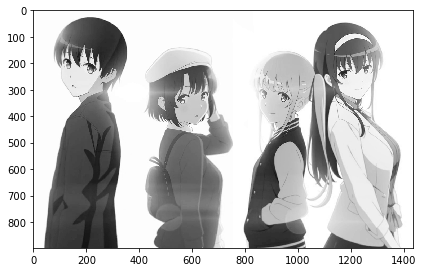

In [1]:
#內差法
from skimage import io
from skimage import transform
import matplotlib.pyplot as plt

c = io.imread("anime.jpg")
io.imshow(c)
head = c[195:245,180:230]

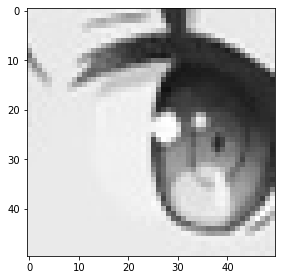

In [2]:
io.imshow(head)

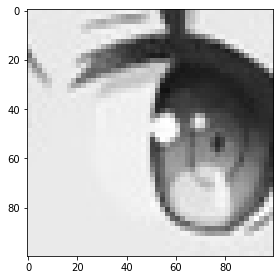

In [3]:
#放大兩倍 近鄰內插(order=0)
head4n_nnr = transform.rescale(head,2, order =0)
io.imshow(head4n_nnr)

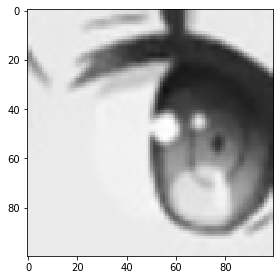

In [4]:
#放大兩倍 雙線性內插法(order=1)
head4n_bl = transform.rescale(head,2, order =1)
io.imshow(head4n_bl)

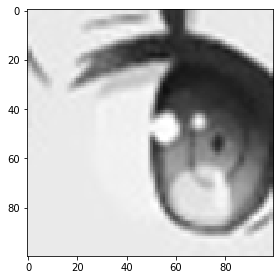

In [5]:
#放大兩倍 立方內插法(order=3)
head4n_cb = transform.rescale(head,2, order =3)
io.imshow(head4n_cb)

In [6]:
'''
m[i,j] 當i ,j 是偶數時傳值 otherwise填0
'''

import numpy as np

m= np.array([[16,2,3,13],[5,11,10,8],[9,7,6,12],[4,14,15,1]])
print(m)
r,c = m.shape
m2 = np.zeros((2*r,2*c))
#偶數的地方填m
m2[::2,::2] = m
print(m2)
#之後再用濾波器即可把0削掉

[[16  2  3 13]
 [ 5 11 10  8]
 [ 9  7  6 12]
 [ 4 14 15  1]]
[[16.  0.  2.  0.  3.  0. 13.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 5.  0. 11.  0. 10.  0.  8.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 9.  0.  7.  0.  6.  0. 12.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 4.  0. 14.  0. 15.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]]


In [7]:
import scipy.ndimage as ndi
import numpy as np

m= np.array([[16,2,3,13],[5,11,10,8],[9,7,6,12],[4,14,15,11]])
r,c = m.shape
m2 = np.zeros((2*r,2*c))
#偶數的地方填m
m2[::2,::2] = m

#三種遮罩
ne = np.array([[0,0,0],[0,1,1],[0,1,1]])
bi = np.array([[1,2,1],[2,4,2],[1,2,1]])/4.0
bc = np.array([[1,4,6,4,1],[4,16,24,16,4],[6,24,36,24,6],[4,16,24,16,4],[1,4,6,4,1]])/64.

m2_ne = ndi.convolve(m2,ne ,mode ='constant')
m2_bi = ndi.convolve(m2,bi,mode ='constant')
m2_bc = ndi.convolve(m2, bc,mode ='constant')

print(m2)
print(m2_ne)
print(m2_bi)
print(m2_bc)

[[16.  0.  2.  0.  3.  0. 13.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 5.  0. 11.  0. 10.  0.  8.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 9.  0.  7.  0.  6.  0. 12.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 4.  0. 14.  0. 15.  0. 11.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]]
[[16. 16.  2.  2.  3.  3. 13. 13.]
 [16. 16.  2.  2.  3.  3. 13. 13.]
 [ 5.  5. 11. 11. 10. 10.  8.  8.]
 [ 5.  5. 11. 11. 10. 10.  8.  8.]
 [ 9.  9.  7.  7.  6.  6. 12. 12.]
 [ 9.  9.  7.  7.  6.  6. 12. 12.]
 [ 4.  4. 14. 14. 15. 15. 11. 11.]
 [ 4.  4. 14. 14. 15. 15. 11. 11.]]
[[16.    9.    2.    2.5   3.    8.   13.    6.5 ]
 [10.5   8.5   6.5   6.5   6.5   8.5  10.5   5.25]
 [ 5.    8.   11.   10.5  10.    9.    8.    4.  ]
 [ 7.    8.    9.    8.5   8.    9.   10.    5.  ]
 [ 9.    8.    7.    6.5   6.    9.   12.    6.  ]
 [ 6.5   8.5  10.5  10.5  10.5  11.   11.5   5.75]
 [ 4.    9.   14.   14.5  15.   13.   11.    5.5 ]
 [ 2.    4.5   7.    7.25  7.5   6.5   5.5   2.75]]
[[ 9.828125  7.75      4.1718

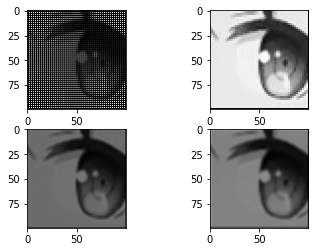

In [8]:
#真實影像的放大
r,c = head.shape
hz = np.zeros((2*r,2*c))
hz[::2,::2] = head
ne = np.array([[0,0,0],[0,1,1],[0,1,1]])
bi = np.array([[1,2,1],[2,4,2],[1,2,1]])/4.0
bc = np.array([[1,4,6,4,1],[4,16,24,16,4],[6,24,36,24,6],[4,16,24,16,4],[1,4,6,4,1]])/64.0

#最近鄰居
hz_ne = ndi.correlate(hz,ne)
#雙線姓
hz_bi = ndi.correlate(hz,bi)
#雙立方
hz_bc = ndi.correlate(hz,bc)

fig = plt.figure()
plt.gray()  # show the filtered result in grayscale
ax1 = fig.add_subplot(221)  # left side
ax2 = fig.add_subplot(222)  # right side
ax3 = fig.add_subplot(223)  # left side
ax4 = fig.add_subplot(224)  # right side

ax1.imshow(hz)
ax2.imshow(hz_ne)
ax3.imshow(hz_bi)
ax4.imshow(hz_bc)
plt.show()


C:\Users\choug\anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


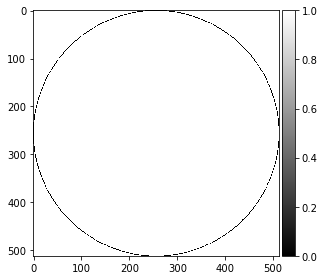

In [9]:
r = [int(x) for x in range(-256,256)]
x, y = np.meshgrid(r,r)

#z:每點與(0,0)的距離
z = np.sqrt(x**2+y**2)
#與(0,0)的距離為255的地方設為0(黑色)
t = 1- ((z>254.5) & (z<256))*1
io.imshow(t, cmap='gray')

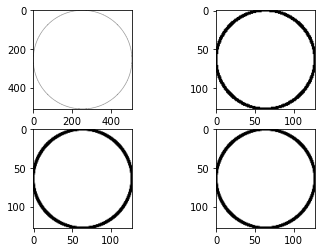

In [10]:
#前面在畫圓
r = [int(x) for x in range(-256,256)]
x, y = np.meshgrid(r,r)
#z:每點與(0,0)的距離
z = np.sqrt(x**2+y**2)
#與(0,0)的距離為255的地方設為0(黑色)
t = 1- ((z>254.5) & (z<256))*1
#鄰近縮小
t_ne = transform.rescale(t,0.25,order =0)
#雙線姓縮小
t_bi = transform.rescale(t,0.25,order =1)
#雙立方縮小
t_bc = transform.rescale(t,0.25,order =3)
fig = plt.figure()
plt.gray()  # show the filtered result in grayscale
ax1 = fig.add_subplot(221)  # left side
ax2 = fig.add_subplot(222)  # right side
ax3 = fig.add_subplot(223)  # left side
ax4 = fig.add_subplot(224)  # right side
ax1.imshow(t)
ax2.imshow(t_ne)
ax3.imshow(t_bi)
ax4.imshow(t_bc)
plt.show()

C:\Users\choug\anaconda3\lib\site-packages\skimage\transform\_warps.py:386: UserWarning: Bi-quadratic interpolation behavior has changed due to a bug in the implementation of scikit-image. The new version now serves as a wrapper around SciPy's interpolation functions, which itself is not verified to be a correct implementation. Until skimage's implementation is fixed, we recommend to use bi-linear or bi-cubic interpolation instead.
  return warp(image, tform, output_shape=output_shape, order=order,


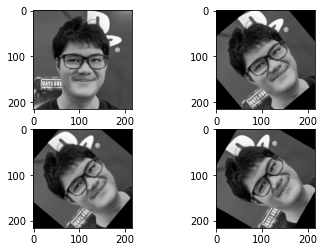

In [11]:
'''
影像旋轉
'''
c = io.imread("davidFace(square).jpg")

#旋轉時也會用到內插方法
c_ne = transform.rotate(c,40, order =0)
c_bi = transform.rotate(c,50, order =1)
c_bc = transform.rotate(c,60, order =2)
fig = plt.figure()
plt.gray()  # show the filtered result in grayscale
ax1 = fig.add_subplot(221)  # left side
ax2 = fig.add_subplot(222)  # right side
ax3 = fig.add_subplot(223)  # left side
ax4 = fig.add_subplot(224)  # right side
ax1.imshow(c)
ax2.imshow(c_ne)
ax3.imshow(c_bi)
ax4.imshow(c_bc)
plt.show()

In [12]:
'''
AFFINE TRANSFORM: 像旋轉
PERSPECTIVE TRANSFORM: 像透視變形
'''

'\nAFFINE TRANSFORM: 像旋轉\nPERSPECTIVE TRANSFORM: 像透視變形\n'

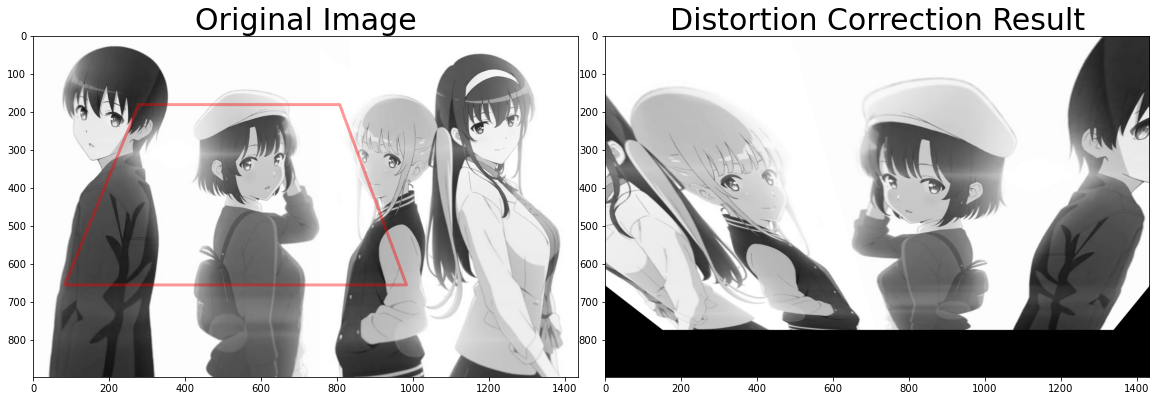

In [28]:
#透視變形校正

import cv2
import matplotlib.pyplot as plt
import numpy as np

#利用 getPerspectiveTransform 來線性轉換
def unwarp(img, src, dst, testing):
    h, w = img.shape[:2]
    # use cv2.getPerspectiveTransform() to get M, the transform matrix, and Minv, the inverse
    #算出轉換攻勢
    M = cv2.getPerspectiveTransform(src, dst)
    # use cv2.warpPerspective() to warp your image to a top-down view
    warped = cv2.warpPerspective(img, M, (w, h), flags=cv2.INTER_LINEAR)
    if testing:
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
        f.subplots_adjust(hspace=.2, wspace=.05)
        ax1.imshow(img)
        x = [src[0][0], src[2][0], src[3][0], src[1][0], src[0][0]]
        y = [src[0][1], src[2][1], src[3][1], src[1][1], src[0][1]]
        ax1.plot(x, y, color='red', alpha=0.4, linewidth=3, solid_capstyle='round', zorder=2)
        ax1.set_ylim([h, 0])
        ax1.set_xlim([0, w])
        ax1.set_title("Original Image", fontsize=30)
        ax2.imshow(cv2.flip(warped, 1))
        ax2.set_title("Distortion Correction Result", fontsize=30)
        plt.show()
    else:
        return warped, M

im = cv2.imread("anime.jpg")

w, h = im.shape[0], im.shape[1]
# We will first manually select the source points
# we will select the destination point which will map the source points in
# original image to destination points in unwarped image
#手動找座標(因為還沒教怎麼自動找)
src = np.float32([(277,     181),
                  (807,  181),
                  (83,    656),
                  (983,  656)])

dst = np.float32([(83, 181),
                  (983, 181),
                  (83, 656),
                  (983, 656)])

unwarp(im, src, dst, True)

